# Boston:

In [226]:
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings(action='ignore',category=DeprecationWarning)



In [1]:
import pandas as pd
a=pd.read_csv('/home/govardhan/Downloads/Boston.csv')
a.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [228]:
print('shape : ',a.shape)
a.info()

shape :  (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [229]:
a.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [230]:
a.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [2]:
from sklearn.decomposition import PCA

In [13]:
pc=PCA(n_components=10)

In [14]:
pc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
model=pc.fit(a)

In [11]:
#model=pc.fit_transform(a)

In [16]:
model.explained_variance_ratio_

array([8.04572190e-01, 1.62705572e-01, 2.14083271e-02, 6.95759438e-03,
       2.00539401e-03, 1.21514667e-03, 4.44138834e-04, 3.52919538e-04,
       2.31912833e-04, 7.08317644e-05])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

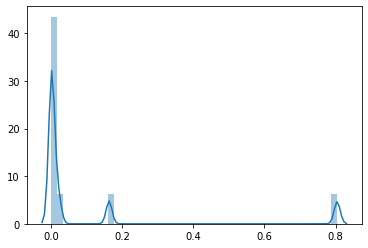

In [20]:
sns.distplot(model.explained_variance_ratio_)

(array([8., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([7.08317644e-05, 8.05209676e-02, 1.60971103e-01, 2.41421239e-01,
        3.21871375e-01, 4.02321511e-01, 4.82771647e-01, 5.63221783e-01,
        6.43671919e-01, 7.24122054e-01, 8.04572190e-01]),
 <a list of 10 Patch objects>)

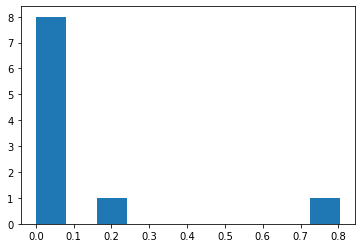

In [22]:
plt.hist(model.explained_variance_ratio_)

In [231]:
import seaborn as sns
a.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [232]:
categorical_var=a.drop(['crim', 'zn', 'indus',  'nox', 'rm', 'age', 'dis',  'tax',
       'ptratio', 'black', 'lstat'],axis=1)
continuous_var=a.drop([ 'chas', 'rad'],axis=1)

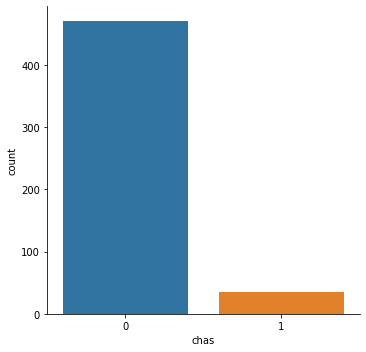

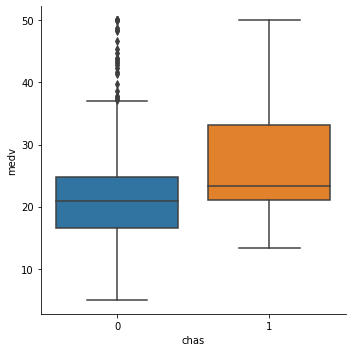

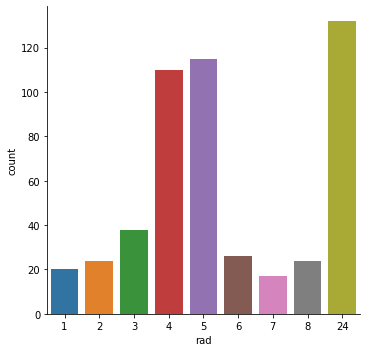

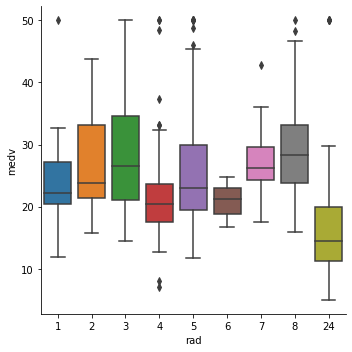

In [233]:
for i in categorical_var:
    if i != 'medv':
        sns.catplot(x=i,data=categorical_var,kind='count')
        sns.catplot(x=i,y='medv',data=categorical_var,kind='box')

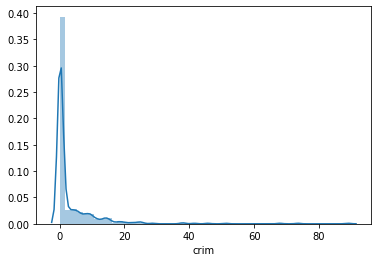

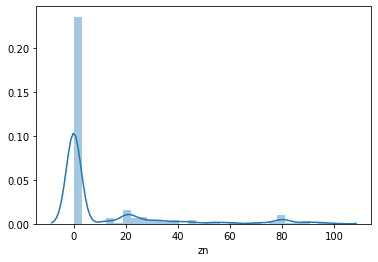

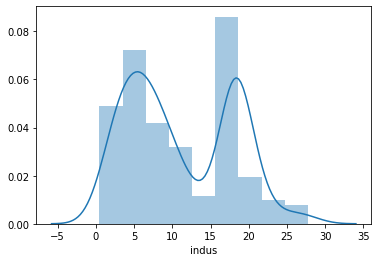

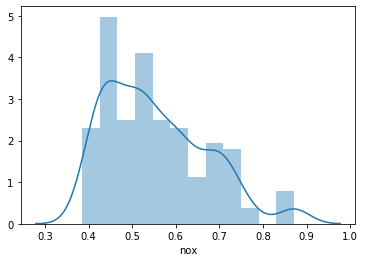

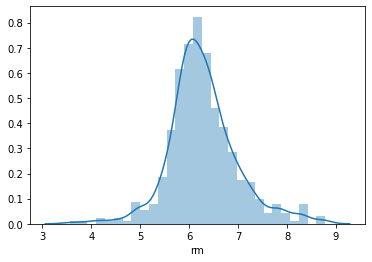

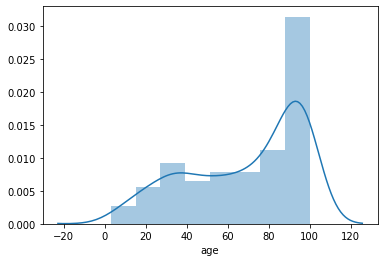

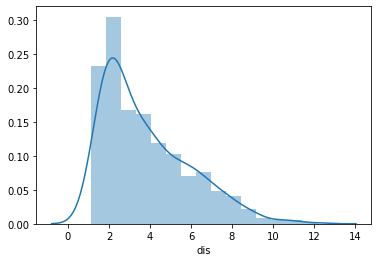

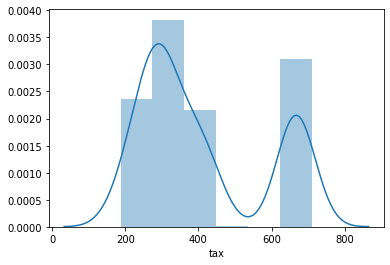

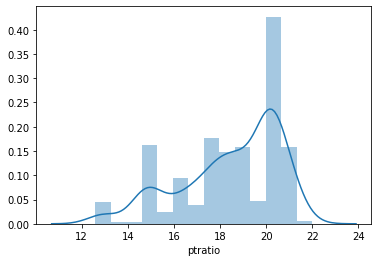

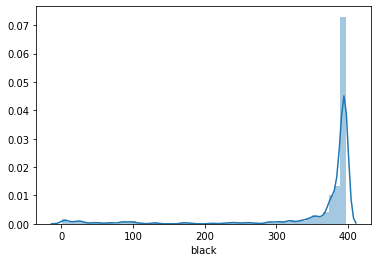

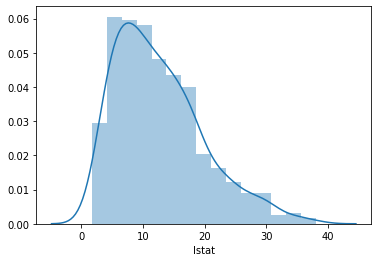

In [234]:
import matplotlib.pyplot as plt
for i in continuous_var:
    if i != 'medv':
        
        sns.distplot(continuous_var[i])
        plt.show()

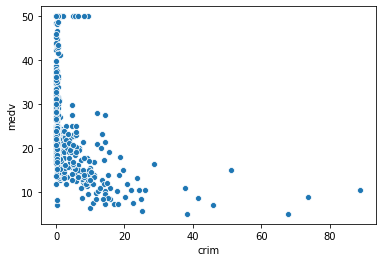

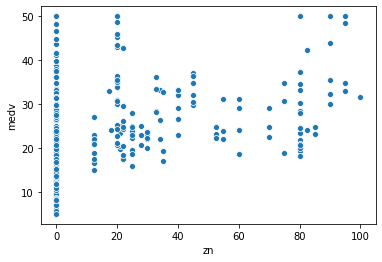

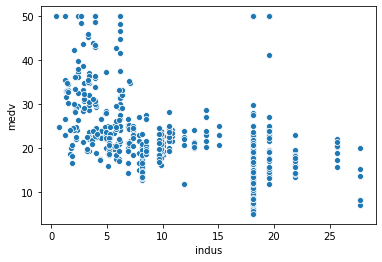

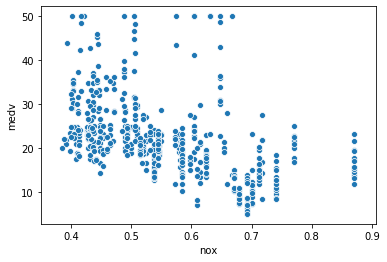

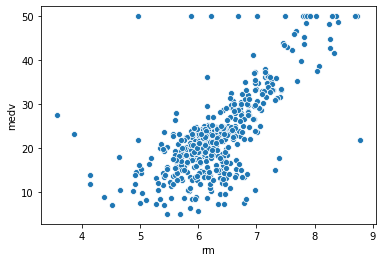

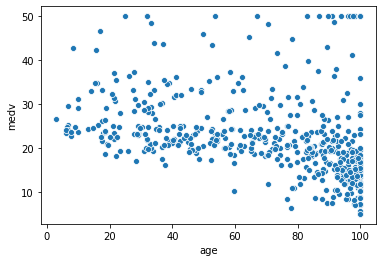

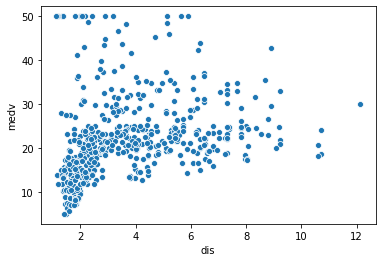

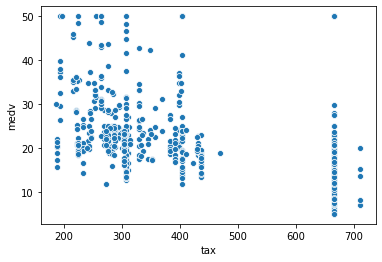

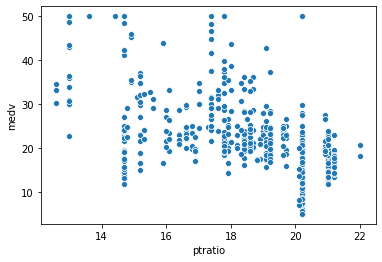

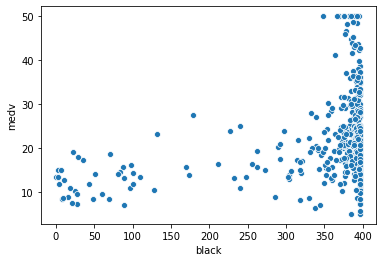

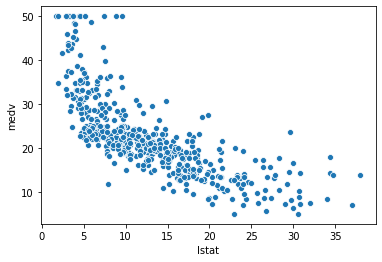

In [235]:
for i in continuous_var:
    if i != 'medv':
        sns.scatterplot(x=i,y='medv',data=continuous_var)
        
        plt.show()

In [236]:
#linear regression:

In [237]:
#corelation:
a_cor=a.corr()
a_cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


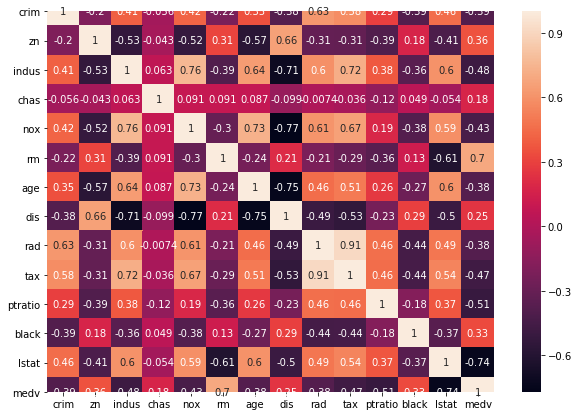

In [238]:
plt.figure(figsize=(10,7))
sns.heatmap(a_cor,annot=True)

In [239]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [240]:
x=a.drop(['medv'],axis=1)
y=a['medv']

In [241]:
x_s=StandardScaler()


In [242]:
x1=x_s.fit_transform(x)
x1=pd.DataFrame(x1)
x1.columns=x.columns

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=12)

In [244]:
lm=cross_val_score(LinearRegression(),x_train,y_train,cv=5)
rr=cross_val_score(Ridge(),x_train,y_train,cv=5)
lr=cross_val_score(Lasso(),x_train,y_train,cv=5)
gb=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5)
xgb=cross_val_score(XGBRegressor(),x_train,y_train,cv=5)
#pr=cross_val_score(PolynomialFeatures(),x_train,y_train,cv=5)

[03:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [245]:
print("cross validation score:")
print("linear regression :",lm,lm.mean(),lm.std())
print("ridge regression :",rr,rr.mean(),rr.std())
print("lasso regression :",lr,lr.mean(),lr.std())
print("gradient boosting :",gb,gb.mean(),gb.std())
print("XG boost :",xgb,xgb.mean(),xgb.std())


cross validation score:
linear regression : [0.70392942 0.57553959 0.78478802 0.74777365 0.6625577 ] 0.69491767684896 0.07245679848925475
ridge regression : [0.70475827 0.57405256 0.7851434  0.74812017 0.66277125] 0.6949691286687809 0.0730886856014733
lasso regression : [0.66856667 0.53434668 0.69268834 0.65538739 0.59787125] 0.6297720645189375 0.056997000901822505
gradient boosting : [0.88629834 0.81922744 0.93712738 0.93464265 0.83387536] 0.8822342347337081 0.04916269894081165
XG boost : [0.87105146 0.81886238 0.92654661 0.9103601  0.86995675] 0.8793554606976521 0.03742992516446665


In [246]:
#Linear regression:
lm=LinearRegression()

In [247]:
model=lm.fit(x_train,y_train)
pred_test=model.predict(x_test)
print("coeff -",model.coef_)
print("intercept -",model.intercept_)

coeff - [-0.84772412  1.08908322  0.20806726  0.76532464 -2.09747006  2.62045816
  0.41334594 -2.89789313  2.82171985 -2.2822341  -1.77372866  0.8295733
 -4.00256638]
intercept - 22.576701710437792


In [248]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  74.8403167892452 %
error -  20.558051634230054


In [249]:
#ridge regression:
rr=Ridge()

In [250]:
#grid search value:
param={"alpha":[10,1,0.1,0.01,0.001,0.0001,0.00001]}
grid=GridSearchCV(estimator=rr,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)

{'alpha': 1e-05}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006067,0.001497,0.003345,0.001422,10,{'alpha': 10},-25.927856,-29.485351,-22.915824,-26.117582,2.683687,7
1,0.002313,0.000238,0.001054,0.000117,1,{'alpha': 1},-25.938309,-28.926857,-23.071709,-25.986154,2.389099,6
2,0.001869,0.000092,0.000877,0.000021,0.1,{'alpha': 0.1},-25.938803,-28.889300,-23.097407,-25.982293,2.363251,5
3,0.002023,0.000380,0.001020,0.000114,0.01,{'alpha': 0.01},-25.938928,-28.885925,-23.100132,-25.982111,2.360760,4
4,0.001867,0.000067,0.000907,0.000033,0.001,{'alpha': 0.001},-25.938941,-28.885591,-23.100406,-25.982095,2.360512,3
5,0.001781,0.000024,0.000900,0.000003,0.0001,{'alpha': 0.0001},-25.938943,-28.885558,-23.100434,-25.982093,2.360487,2
6,0.001891,0.000139,0.000896,0.000027,1e-05,{'alpha': 1e-05},-25.938943,-28.885555,-23.100436,-25.982093,2.360484,1


In [251]:
rr=Ridge(alpha=0.00001)
model=rr.fit(x_train,y_train)
pred_test=model.predict(x_test)


In [252]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  74.8403170807713 %
error -  20.558051396023203


In [253]:
#polynomial regression:
pf=PolynomialFeatures(degree=2)

In [254]:
model=pf.fit_transform(x_train)
model_test=pf.fit_transform(x_test)

In [255]:
model1=lm.fit(model,y_train)
pred=model1.predict(model_test)

In [256]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred,y_true=y_test))

TEST DATA:
accuracy -  79.84399884911619 %
error -  16.469528210209862


In [257]:
#Gradient boosting:
gb=GradientBoostingRegressor()
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [258]:
param={'alpha':[0.9,0.1,0.01,0.001,0.0001,0.00001],'max_depth':[2,3,5,7,9,10,15,20]}
grid=GridSearchCV(estimator=gb,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)

{'alpha': 0.01, 'max_depth': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037305,0.011152,0.001058,0.000178,0.9,2,"{'alpha': 0.9, 'max_depth': 2}",-17.158089,-15.263441,-12.562048,-15.000547,1.884378,16
1,0.035269,0.000635,0.001021,0.000029,0.9,3,"{'alpha': 0.9, 'max_depth': 3}",-12.374015,-10.269353,-11.885010,-11.508530,0.900243,5
2,0.065691,0.000666,0.001450,0.000026,0.9,5,"{'alpha': 0.9, 'max_depth': 5}",-12.423396,-9.297478,-15.934591,-12.543448,2.709229,10
3,0.079944,0.000965,0.001396,0.000005,0.9,7,"{'alpha': 0.9, 'max_depth': 7}",-14.648983,-12.531615,-20.356217,-15.834440,3.300994,20
4,0.116268,0.007355,0.001748,0.000041,0.9,9,"{'alpha': 0.9, 'max_depth': 9}",-17.143798,-13.176715,-27.127975,-19.129747,5.863305,31
5,0.122060,0.005096,0.001782,0.000079,0.9,10,"{'alpha': 0.9, 'max_depth': 10}",-17.872176,-14.881835,-25.284169,-19.331361,4.368153,32
6,0.131910,0.003081,0.001891,0.000176,0.9,15,"{'alpha': 0.9, 'max_depth': 15}",-19.120704,-15.370350,-24.505575,-19.653563,3.746173,36
7,0.127039,0.000825,0.001690,0.000015,0.9,20,"{'alpha': 0.9, 'max_depth': 20}",-19.376628,-15.465236,-25.593466,-20.131624,4.166715,44
8,0.027286,0.000039,0.000914,0.000004,0.1,2,"{'alpha': 0.1, 'max_depth': 2}",-17.137498,-15.248037,-12.569408,-14.990960,1.872624,13
9,0.037557,0.001975,0.001133,0.000106,0.1,3,"{'alpha': 0.1, 'max_depth': 3}",-12.428220,-10.178643,-11.978811,-11.527444,0.972950,6


In [259]:
gb=GradientBoostingRegressor(alpha=0.01,max_depth=3)
model=gb.fit(x_train,y_train)
pred_test=model.predict(x_test)

In [260]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  86.26967040863708 %
error -  11.219092956368254


In [261]:
#xgboost:
xgb=XGBRegressor()
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [262]:
param={'base_score':[0.9,0.5,0.1,0.01,0.001,0.0001,0.00001],'max_depth':[2,3,5,7,9,10,15,20]}
grid=GridSearchCV(estimator=xgb,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)


[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[03:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[03:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [263]:
xgb=XGBRegressor(base_score=0.01,max_depth=5)

In [264]:
model=xgb.fit(x_train,y_train)
pred_test=model.predict(x_test)

[03:08:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [265]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

TEST DATA:
accuracy -  88.31110738150522 %
error -  9.551028762367986


In [266]:
pd.DataFrame(pred_test)

,0
0,22.637733
1,12.626349
2,6.035876
3,26.626884
4,29.485947
...,...
97,15.550545
98,27.356010
99,14.540745
100,31.811232
